[link text](https://)  
#  P_oversample_NP_undersample

## Setup

In [ ]:
!pip install "tensorflow-text>=2.10"
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

In [ ]:
import numpy as np
import typing
from typing import Any, Tuple
from sklearn.model_selection import train_test_split

import pathlib

import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import tensorflow as tf
import tensorflow_text as tf_text

In [ ]:
#@title
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    parsed = einops.parse_shape(tensor, names)

    for name, new_dim in parsed.items():
      old_dim = self.shapes.get(name, None)
      
      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

#### Loading the Dataset

In [ ]:
import pandas as pd
ORM_data = pd.read_csv('3_OM_P_oversample.csv')


In [ ]:
ORM_data.head()

,OM_Regular,OM_Prediction
0,"moduleOM_name:0,openDeclarationonesigclass1_na...","moduleOM_name:0,openDeclarationonesigclass1_na..."
1,"moduleOM_name:0,openDeclarationonesigclass1_na...","moduleOM_name:0,openDeclarationonesigclass1_na..."
2,"moduleOM_name:0,openDeclarationonesigclass1_na...","moduleOM_name:0,openDeclarationonesigclass1_na..."
3,"moduleOM_name:0,openDeclarationonesigclass1_na...","moduleOM_name:0,openDeclarationonesigclass1_na..."
4,"moduleOM_name:0,openDeclarationonesigclass1_na...","moduleOM_name:0,openDeclarationonesigclass1_na..."


In [ ]:
OM_Regular = ORM_data['OM_Regular'].values
OM_Prediction = ORM_data['OM_Prediction'].values

In [ ]:
X = OM_Regular
Y = OM_Prediction

#### Dividing data as Target and Context

In [ ]:
target_raw =  Y
context_raw = X
print(context_raw[-1])

moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparenti

In [ ]:
print(target_raw[-1])

moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparenti

### Create a tf.data dataset

From these arrays of strings you can create a `tf.data.Dataset` of strings that shuffles and batches them efficiently:

In [ ]:
BUFFER_SIZE = len(context_raw)
BATCH_SIZE = 1

is_train = np.random.uniform(size=(len(target_raw),)) < 0.8

train_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[is_train], target_raw[is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))
val_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[~is_train], target_raw[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

In [ ]:
for example_context_strings, example_target_strings in train_raw.take(1):
  print(example_context_strings[:5])
  print()
  print(example_target_strings[:5])
  break

tf.Tensor([b'moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_a

### Text preprocessing

One of the goals of this tutorial is to build a model that can be exported as a `tf.saved_model`. To make that exported model useful it should take `tf.string` inputs, and return `tf.string` outputs: All the text processing happens inside the model. Mainly using a `layers.TextVectorization` layer.

#### Standardization

The model is dealing with multilingual text with a limited vocabulary. So it will be important to standardize the input text.

The first step is Unicode normalization to split accented characters and replace compatibility characters with their ASCII equivalents.

The `tensorflow_text` package contains a unicode normalize operation, We may or may not decide to Use this for ORM data. I kept it in the experiment

In [ ]:
example_text = tf.constant('moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,​OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc1`(`c5_at1`c5_at1_type`c1_at1`c1_at1_typeKEY`FK_assoc1_c5_at1_idx`(`c5_at1`)KEY`FK_assoc1_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`c5_at1``c1_at1`));----CREATETABLE`assoc3``c5_at1`c5_at1_type`c4_at1`c4_at1_typeKEY`FK_assoc3_c5_at1_idx`(`c5_at1`)KEY`FK_assoc3_c4_at1_idx`(`c4_at1`)PRIMARYKEY(`c5_at1``c4_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type`c5_at1`c5_at1_typePRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type`c3_at1`c3_at1_typeNOTNULLPRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type`c2_at1`c2_at1_typePRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_typePRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_typePRIMARYKEY(`c1_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type`c6_at3`c6_at3_type`c6_at2`c6_at2_type`c6_at1`c6_at1_typeNOTNULLPRIMARYKEY(`c6_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type`c2_at1`c2_at1_typeKEY`FK_assoc2_c5_at1_idx`(`c5_at1`)KEY`FK_assoc2_c2_at1_idx`(`c2_at1`)PRIMARYKEY(`c5_at1``c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL`c2_at1`c2_at1_typeKEY`FK_assoc5_c3_at1_idx`(`c3_at1`)KEY`FK_assoc5_c2_at1_idx`(`c2_at1`)PRIMARYKEY(`c3_at1``c2_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL`c2_at1`c2_at1_typeKEY`FK_assoc4_c6_at1_idx`(`c6_at1`)KEY`FK_assoc4_c2_at1_idx`(`c2_at1`)PRIMARYKEY(`c6_at1``c2_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADEALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE')

#example_text = tf.constant('class1,table2,obj1,atr1')
print(example_text.numpy())
print(tf_text.normalize_utf8(example_text, 'NFKD').numpy())

b'moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparen

In [ ]:
#import re

#def tf_lower_and_split_punct(text):
  # Split accented characters.
  #text = tf_text.normalize_utf8(text, 'NFKD')
  #text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  #pattern = '\s+'
  #re.split(pattern, text, maxsplit=2)
  #text = tf.strings.regex_replace(text, '\s+', '')
  #tf.strings.split(text, sep=', ', maxsplit=2, name=None)
  #tf.strings.split (text, sep='\s+', maxsplit=2, name=None)
  #text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  #tf.strings.split(text, ',')
  #text = tf.strings.split(text, sep=None, maxsplit=-1, name=None)
  #text.tf.strings.split(', ')

  # Add spaces around punctuation.
  #text = tf.strings.regex_replace(text, '', r'')
  # Strip whitespace.
  #text = tf.strings.strip(text)

  #text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  #return text

def tf_lower_and_split_punct(text):
  # Split accented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '', r'\0')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text



In [ ]:
print(example_text.numpy().decode())
print(tf_lower_and_split_punct(example_text).numpy().decode())

moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparenti

#### Text Vectorization

This standardization function will be wrapped up in a `tf.keras.layers.TextVectorization` layer which will handle the vocabulary extraction and conversion of input text to sequences of tokens.

In [ ]:
max_vocab_size = 5000

context_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

The `TextVectorization` layer and many other [Keras preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) have an `adapt` method. This method reads one epoch of the training data, and works a lot like `Model.fit`. This `adapt` method initializes the layer based on the data. Here it determines the vocabulary:

In [ ]:
context_text_processor.adapt(train_raw.map(lambda context, target: context))

# Here are the first 10 words from the vocabulary:
context_text_processor.get_vocabulary()[:50]

['',
 '[UNK]',
 '[START]',
 '[END]',
 'moduleom_name:0opendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsclassattrset=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3id=c6_at1noparentisabstract=no}onesigc6_at1extendsc6_at1_typeonesigc6_at2ex

That's the context data  `TextVectorization` layer, now build and `.adapt()` for the Target Data one:

In [ ]:
target_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

target_text_processor.adapt(train_raw.map(lambda context, target: target))
target_text_processor.get_vocabulary()[:50]

['',
 '[UNK]',
 '[START]',
 '[END]',
 'moduleom_name:0opendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsclassattrset=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3id=c6_at1noparentisabstract=no}onesigc6_at1extendsc6_at1_typeonesigc6_at2ex

Now these layers can convert a batch of strings into a batch of token IDs:

In [ ]:
example_tokens = context_text_processor(example_context_strings)
example_tokens[:3, :]

<tf.RaggedTensor [[2, 6, 3]]>

The `get_vocabulary` method can be used to convert token IDs back to text:

In [ ]:
context_vocab = np.array(context_text_processor.get_vocabulary())
tokens = context_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] moduleom_name:0opendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsclassattrset=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3id=c6_at1noparentisabstract=no}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3ex

The returned token IDs are zero-padded. This can easily be turned into a mask:

Text(0.5, 1.0, 'Mask')

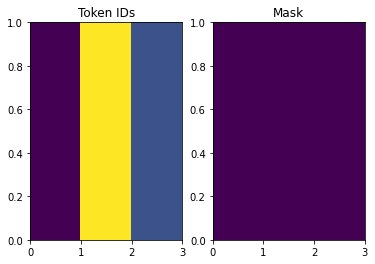

In [ ]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens.to_tensor())
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens.to_tensor() != 0)
plt.title('Mask')

### Process the dataset



The `process_text` function below converts the `Datasets` of strings, into  0-padded tensors of token IDs. It also converts from a `(context, target)` pair to an `((context, target_in), target_out)` pair for training with `keras.Model.fit`. Keras expects `(inputs, labels)` pairs, the inputs are the `(context, target_in)` and the labels are `target_out`. The difference between `target_in` and `target_out` is that they are shifted by one step relative to eachother, so that at each location the label is the next token.

In [ ]:
def process_text(context, target):
  context = context_text_processor(context).to_tensor()
  target = target_text_processor(target)
  targ_in = target[:,:-1].to_tensor()
  targ_out = target[:,1:].to_tensor()
  return (context, targ_in), targ_out


train_ds = train_raw.map(process_text, tf.data.AUTOTUNE)
val_ds = val_raw.map(process_text, tf.data.AUTOTUNE)

Here is the first sequence of each, from the first batch:

In [ ]:
for (ex_context_tok, ex_tar_in), ex_tar_out in train_ds.take(1):
  print(ex_context_tok[0, :10].numpy()) 
  print()
  print(ex_tar_in[0, :10].numpy()) 
  print(ex_tar_out[0, :10].numpy()) 

[2 5 3]

[2 5]
[5 3]


## The encoder/decoder

  <th colspan=1>This tutorial's model</th>
<tr>
</table>


Before getting into it define constants for the model:

In [ ]:
UNITS = 256

### The encoder


The encoder:

1. Takes a list of token IDs (from `context_text_processor`).
3. Looks up an embedding vector for each token (Using a `layers.Embedding`).
4. Processes the embeddings into a new sequence (Using a bidirectional `layers.GRU`).
5. Returns the processed sequence. This will be passed to the attention head.

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, text_processor, units):
    super(Encoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.units = units
    
    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, units,
                                               mask_zero=True)

    # The RNN layer processes those vectors sequentially.
    self.rnn = tf.keras.layers.Bidirectional(
        merge_mode='sum',
        layer=tf.keras.layers.GRU(units,
                            # Return the sequence and state
                            return_sequences=True,
                            recurrent_initializer='glorot_uniform'))

  def call(self, x):
    shape_checker = ShapeChecker()
    shape_checker(x, 'batch s')

    # 2. The embedding layer looks up the embedding vector for each token.
    x = self.embedding(x)
    shape_checker(x, 'batch s units')

    # 3. The GRU processes the sequence of embeddings.
    x = self.rnn(x)
    shape_checker(x, 'batch s units')

    # 4. Returns the new sequence of embeddings.
    return x

  def convert_input(self, texts):
    texts = tf.convert_to_tensor(texts)
    if len(texts.shape) == 0:
      texts = tf.convert_to_tensor(texts)[tf.newaxis]
    context = self.text_processor(texts).to_tensor()
    context = self(context)
    return context

In [ ]:
# Encode the input sequence.
encoder = Encoder(context_text_processor, UNITS)
ex_context = encoder(ex_context_tok)

print(f'Context tokens, shape (batch, s): {ex_context_tok.shape}')
print(f'Encoder output, shape (batch, s, units): {ex_context.shape}')

Context tokens, shape (batch, s): (1, 3)
Encoder output, shape (batch, s, units): (1, 3, 256)


### The attention layer

The attention layer lets the decoder access the information extracted by the encoder. It computes a vector from the entire context sequence, and adds that to the decoder's output. 


In [ ]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

  def call(self, x, context):
    shape_checker = ShapeChecker()
 
    shape_checker(x, 'batch t units')
    shape_checker(context, 'batch s units')

    attn_output, attn_scores = self.mha(
       query=x,
       value=context,
      return_attention_scores=True)
    
    shape_checker(x, 'batch t units')
    shape_checker(attn_scores, 'batch heads t s')
    
  #Cache the attention scores for plotting later.
    attn_scores = tf.reduce_mean(attn_scores, axis=1)
    shape_checker(attn_scores, 'batch t s')
    self.last_attention_weights = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [ ]:
attention_layer = CrossAttention(UNITS)

# Attend to the encoded tokens
embed = tf.keras.layers.Embedding(target_text_processor.vocabulary_size(),
                                 output_dim=UNITS, mask_zero=True)
ex_tar_embed = embed(ex_tar_in)

result = attention_layer(ex_tar_embed, ex_context)

print(f'Context sequence, shape (batch, s, units): {ex_context.shape}')
print(f'Target sequence, shape (batch, t, units): {ex_tar_embed.shape}')
print(f'Attention result, shape (batch, t, units): {result.shape}')
print(f'Attention weights, shape (batch, t, s):    {attention_layer.last_attention_weights.shape}')

Context sequence, shape (batch, s, units): (1, 3, 256)
Target sequence, shape (batch, t, units): (1, 2, 256)
Attention result, shape (batch, t, units): (1, 2, 256)
Attention weights, shape (batch, t, s):    (1, 2, 3)


The attention weights will sum to `1` over the context sequence, at each location in the target sequence.

In [ ]:
attention_layer.last_attention_weights[0].numpy().sum(axis=-1)

array([1., 1.], dtype=float32)



Here are the attention weights across the context sequences at `t=0`:

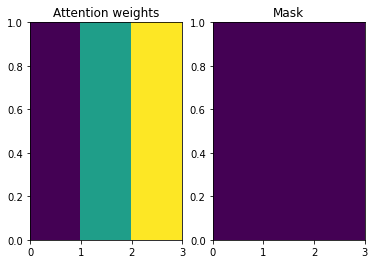

In [ ]:
attention_weights = attention_layer.last_attention_weights
mask=(ex_context_tok != 0).numpy()

plt.subplot(1, 2, 1)
plt.pcolormesh(mask*attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(mask)
plt.title('Mask');

Because of the small-random initialization the attention weights are initially all close to `1/(sequence_length)`. The model will learn to make these less uniform as training progresses.

### The decoder

The decoder's job is to generate predictions for the next token at each location in the target sequence.

1. It looks up embeddings for each token in the target sequence.
2. It uses an RNN to process the target sequence, and keep track of what it has generated so far.
3. It uses RNN output as the "query" to the attention layer, when attending to the encoder's output.
4. At each location in the output it predicts the next token.


Here is the `Decoder` class' initializer. The initializer creates all the necessary layers.

In [ ]:
class Decoder(tf.keras.layers.Layer):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, text_processor, units):
    super(Decoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.word_to_id = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]')
    self.id_to_word = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]',
        invert=True)
    self.start_token = self.word_to_id('[START]')
    self.end_token = self.word_to_id('[END]')

    self.units = units


    # 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,
                                               units, mask_zero=True)

    # 2. The RNN keeps track of what's been generated so far.
    self.rnn = tf.keras.layers.GRU(units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # 3. The RNN output will be the query for the attention layer.
    self.attention = CrossAttention(units)

    # 4. This fully connected layer produces the logits for each
    # output token.
    self.output_layer = tf.keras.layers.Dense(self.vocab_size)

#### Training

Next, the `call` method, takes 3 arguments:

* `inputs` -  a `context, x` pair where:
  * `context` - is the context from the encoder's output.
  * `x` - is the target sequence input.
* `state` - Optional, the previous `state` output from the decoder (the internal state of the decoder's RNN). Pass the state from a previous run to continue generating text where you left off.
* `return_state` - [Default: False] - Set this to `True` to return the RNN state. 

In [ ]:
@Decoder.add_method
def call(self,
         context, x,
         state=None,
         return_state=False):  
  shape_checker = ShapeChecker()
  shape_checker(x, 'batch t')
  shape_checker(context, 'batch s units')

  # 1. Lookup the embeddings
  x = self.embedding(x)
  shape_checker(x, 'batch t units')

  # 2. Process the target sequence.
  x, state = self.rnn(x, initial_state=state)
  shape_checker(x, 'batch t units')

  # 3. Use the RNN output as the query for the attention over the context.
  x = self.attention(x, context)
  self.last_attention_weights = self.attention.last_attention_weights
  shape_checker(x, 'batch t units')
  shape_checker(self.last_attention_weights, 'batch t s')

  # Step 4. Generate logit predictions for the next token.
  logits = self.output_layer(x)
  shape_checker(logits, 'batch t target_vocab_size')

  if return_state:
    return logits, state
  else:
    return logits

That will be sufficient for training. Create an instance of the decoder to test out:

In [ ]:
decoder = Decoder(target_text_processor, UNITS)

Decoder usage

In [ ]:
logits = decoder(ex_context, ex_tar_in)

print(f'encoder output shape: (batch, s, units) {ex_context.shape}')
print(f'input target tokens shape: (batch, t) {ex_tar_in.shape}')
print(f'logits shape shape: (batch, target_vocabulary_size) {logits.shape}')

encoder output shape: (batch, s, units) (1, 3, 256)
input target tokens shape: (batch, t) (1, 2)
logits shape shape: (batch, target_vocabulary_size) (1, 2, 147)


#### Inference

For inference usage couple more methods.

In [ ]:
@Decoder.add_method
def get_initial_state(self, context):
  batch_size = tf.shape(context)[0]
  start_tokens = tf.fill([batch_size, 1], self.start_token)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  embedded = self.embedding(start_tokens)
  return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

In [ ]:
@Decoder.add_method
def tokens_to_text(self, tokens):
  words = self.id_to_word(tokens)
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
  result = tf.strings.regex_replace(result, ' *\[END\] *$', '')
  return result

In [ ]:
@Decoder.add_method
def get_next_token(self, context, next_token, done, state, temperature = 0.0):
  logits, state = self(
    context, next_token,
    state = state,
    return_state=True) 
  
  if temperature == 0.0:
    next_token = tf.argmax(logits, axis=-1)
  else:
    logits = logits[:, -1, :]/temperature
    next_token = tf.random.categorical(logits, num_samples=1)

  # If a sequence produces an `end_token`, set it `done`
  done = done | (next_token == self.end_token)
  # Once a sequence is done it only produces 0-padding.
  next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)
  
  return next_token, done, state

With those extra functions, you can write a generation loop:

In [ ]:
# Setup the loop variables.
next_token, done, state = decoder.get_initial_state(ex_context)
tokens = []

for n in range(10):
  # Run one step.
  next_token, done, state = decoder.get_next_token(
      ex_context, next_token, done, state, temperature=1.0)
  # Add the token to the output.
  tokens.append(next_token)

# Stack all the tokens together.
tokens = tf.concat(tokens, axis=-1) # (batch, t)

# Convert the tokens back to a a string
result = decoder.tokens_to_text(tokens)
result[:3].numpy()

array([b'moduleom_name:0opendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsclassattrset=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3id=c6_at1noparentisabstract=no}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3ex



```
# This is formatted as code
```

**Since the model's untrained, it outputs items from the vocabulary almost uniformly at random. **

## The model


In [ ]:
class Translator(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, units,
               context_text_processor,
               target_text_processor):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(context_text_processor, units)
    decoder = Decoder(target_text_processor, units)

    self.encoder = encoder
    self.decoder = decoder

  def call(self, inputs):
    context, x = inputs
    context = self.encoder(context)
    logits = self.decoder(context, x)

    #TODO(b/250038731): remove this
    try:
      # Delete the keras mask, so keras doesn't scale the loss+accuracy. 
      del logits._keras_mask
    except AttributeError:
      pass

    return logits

During training the model will be used like this:

In [ ]:
model = Translator(UNITS, context_text_processor, target_text_processor)

logits = model((ex_context_tok, ex_tar_in))

print(f'Context tokens, shape: (batch, s, units) {ex_context_tok.shape}')
print(f'Target tokens, shape: (batch, t) {ex_tar_in.shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (1, 3)
Target tokens, shape: (batch, t) (1, 2)
logits, shape: (batch, t, target_vocabulary_size) (1, 2, 147)


### Train

In [ ]:
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

In [ ]:
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)
    
    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)
    
    return tf.reduce_sum(match)/tf.reduce_sum(mask)

Configure the model for training:

In [ ]:
model.compile(optimizer='Adam',
              loss=masked_loss, 
              metrics=[masked_acc, masked_loss])

The model is randomly initialized, and should give roughly uniform output probabilities. So it's easy to predict what the initial values of the metrics should be:

In [ ]:
vocab_size = 1.0 * target_text_processor.vocabulary_size()

{"expected_loss": tf.math.log(vocab_size).numpy(),
 "expected_acc": 1/vocab_size}

{'expected_loss': 4.9904327, 'expected_acc': 0.006802721088435374}

That should roughly match the values returned by running a few steps of evaluation:

In [ ]:
model.evaluate(val_ds, steps=60, return_dict=True)

38/60 [==================>...........] - ETA: 0s - loss: 5.0198 - masked_acc: 0.0000e+00 - masked_loss: 5.0198

60/60 [==============================] - 9s 9ms/step - loss: 5.0147 - masked_acc: 0.0000e+00 - masked_loss: 5.0147


{'loss': 5.014719486236572,
 'masked_acc': 0.0,
 'masked_loss': 5.014719486236572}

In [ ]:
history = model.fit(
    train_ds.repeat(), 
    epochs=100,
    steps_per_epoch = 100,
    validation_data=val_ds,
    validation_steps = 60,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=8)])

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 3.2005 - masked_acc: 0.4950 - masked_loss: 3.2005

100/100 [==============================] - 20s 45ms/step - loss: 3.2005 - masked_acc: 0.4950 - masked_loss: 3.2005 - val_loss: 3.2266 - val_masked_acc: 0.5000 - val_masked_loss: 3.2266
Epoch 2/100
 99/100 [============================>.] - ETA: 0s - loss: 3.0494 - masked_acc: 0.5000 - masked_loss: 3.0494

100/100 [==============================] - 4s 38ms/step - loss: 3.0592 - masked_acc: 0.5000 - masked_loss: 3.0592
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 2.8913 - masked_acc: 0.5150 - masked_loss: 2.8913

100/100 [==============================] - 7s 65ms/step - loss: 2.8913 - masked_acc: 0.5150 - masked_loss: 2.8913
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 3.0252 - masked_acc: 0.5050 - masked_loss: 3.0252

100/100 [==============================] - 4s 39ms/step - loss: 3.0252 - masked_acc: 0.5050 - masked_loss: 3.0252
Epoch 5/100
100/100 [==============================] - ETA: 0s - loss: 2.6763 - masked_acc: 0.5100 - masked_loss: 2.6763

100/100 [==============================] - 4s 39ms/step - loss: 2.6763 - masked_acc: 0.5100 - masked_loss: 2.6763
Epoch 6/100
100/100 [==============================] - ETA: 0s - loss: 2.5340 - masked_acc: 0.5350 - masked_loss: 2.5340

100/100 [==============================] - 5s 49ms/step - loss: 2.5340 - masked_acc: 0.5350 - masked_loss: 2.5340
Epoch 7/100
 99/100 [============================>.] - ETA: 0s - loss: 2.1085 - masked_acc: 0.5505 - masked_loss: 2.1085

100/100 [==============================] - 6s 56ms/step - loss: 2.1084 - masked_acc: 0.5500 - masked_loss: 2.1084
Epoch 8/100
 99/100 [============================>.] - ETA: 0s - loss: 1.7756 - masked_acc: 0.6263 - masked_loss: 1.7756

100/100 [==============================] - 4s 37ms/step - loss: 1.7788 - masked_acc: 0.6250 - masked_loss: 1.7788
Epoch 9/100
 99/100 [============================>.] - ETA: 0s - loss: 1.2815 - masked_acc: 0.6970 - masked_loss: 1.2815

100/100 [==============================] - 4s 38ms/step - loss: 1.2910 - masked_acc: 0.6950 - masked_loss: 1.2910
Epoch 10/100
100/100 [==============================] - ETA: 0s - loss: 1.1747 - masked_acc: 0.6950 - masked_loss: 1.1747

100/100 [==============================] - 6s 60ms/step - loss: 1.1747 - masked_acc: 0.6950 - masked_loss: 1.1747
Epoch 11/100
 99/100 [============================>.] - ETA: 0s - loss: 0.7512 - masked_acc: 0.8030 - masked_loss: 0.7512

100/100 [==============================] - 5s 45ms/step - loss: 0.7442 - masked_acc: 0.8050 - masked_loss: 0.7442
Epoch 12/100
100/100 [==============================] - ETA: 0s - loss: 0.7546 - masked_acc: 0.7700 - masked_loss: 0.7546

100/100 [==============================] - 4s 38ms/step - loss: 0.7546 - masked_acc: 0.7700 - masked_loss: 0.7546
Epoch 13/100
100/100 [==============================] - ETA: 0s - loss: 0.3677 - masked_acc: 0.9100 - masked_loss: 0.3677

100/100 [==============================] - 4s 42ms/step - loss: 0.3677 - masked_acc: 0.9100 - masked_loss: 0.3677
Epoch 14/100
 99/100 [============================>.] - ETA: 0s - loss: 0.3576 - masked_acc: 0.9343 - masked_loss: 0.3576

100/100 [==============================] - 6s 64ms/step - loss: 0.3552 - masked_acc: 0.9350 - masked_loss: 0.3552
Epoch 15/100
 99/100 [============================>.] - ETA: 0s - loss: 0.1440 - masked_acc: 0.9697 - masked_loss: 0.1440

100/100 [==============================] - 4s 38ms/step - loss: 0.1427 - masked_acc: 0.9700 - masked_loss: 0.1427
Epoch 16/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0800 - masked_acc: 0.9949 - masked_loss: 0.0800

100/100 [==============================] - 4s 38ms/step - loss: 0.0807 - masked_acc: 0.9950 - masked_loss: 0.0807
Epoch 17/100
100/100 [==============================] - ETA: 0s - loss: 0.1143 - masked_acc: 0.9850 - masked_loss: 0.1143

100/100 [==============================] - 5s 53ms/step - loss: 0.1143 - masked_acc: 0.9850 - masked_loss: 0.1143
Epoch 18/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0747 - masked_acc: 0.9899 - masked_loss: 0.0747

100/100 [==============================] - 5s 53ms/step - loss: 0.0743 - masked_acc: 0.9900 - masked_loss: 0.0743
Epoch 19/100
100/100 [==============================] - ETA: 0s - loss: 0.0469 - masked_acc: 0.9900 - masked_loss: 0.0469

100/100 [==============================] - 4s 38ms/step - loss: 0.0469 - masked_acc: 0.9900 - masked_loss: 0.0469
Epoch 20/100
100/100 [==============================] - ETA: 0s - loss: 0.0321 - masked_acc: 0.9950 - masked_loss: 0.0321

100/100 [==============================] - 4s 37ms/step - loss: 0.0321 - masked_acc: 0.9950 - masked_loss: 0.0321
Epoch 21/100
100/100 [==============================] - ETA: 0s - loss: 0.0331 - masked_acc: 0.9950 - masked_loss: 0.0331

100/100 [==============================] - 6s 63ms/step - loss: 0.0331 - masked_acc: 0.9950 - masked_loss: 0.0331
Epoch 22/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0666 - masked_acc: 0.9848 - masked_loss: 0.0666

100/100 [==============================] - 4s 42ms/step - loss: 0.0661 - masked_acc: 0.9850 - masked_loss: 0.0661
Epoch 23/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0431 - masked_acc: 0.9899 - masked_loss: 0.0431

100/100 [==============================] - 4s 38ms/step - loss: 0.0428 - masked_acc: 0.9900 - masked_loss: 0.0428
Epoch 24/100
100/100 [==============================] - ETA: 0s - loss: 0.0190 - masked_acc: 0.9950 - masked_loss: 0.0190

100/100 [==============================] - 4s 44ms/step - loss: 0.0190 - masked_acc: 0.9950 - masked_loss: 0.0190
Epoch 25/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0678 - masked_acc: 0.9798 - masked_loss: 0.0678

100/100 [==============================] - 6s 62ms/step - loss: 0.0671 - masked_acc: 0.9800 - masked_loss: 0.0671
Epoch 26/100
100/100 [==============================] - ETA: 0s - loss: 0.0066 - masked_acc: 1.0000 - masked_loss: 0.0066

100/100 [==============================] - 4s 37ms/step - loss: 0.0066 - masked_acc: 1.0000 - masked_loss: 0.0066
Epoch 27/100
100/100 [==============================] - ETA: 0s - loss: 0.0355 - masked_acc: 0.9900 - masked_loss: 0.0355

100/100 [==============================] - 4s 38ms/step - loss: 0.0355 - masked_acc: 0.9900 - masked_loss: 0.0355
Epoch 28/100
100/100 [==============================] - ETA: 0s - loss: 0.0405 - masked_acc: 0.9900 - masked_loss: 0.0405

100/100 [==============================] - 5s 54ms/step - loss: 0.0405 - masked_acc: 0.9900 - masked_loss: 0.0405
Epoch 29/100
100/100 [==============================] - ETA: 0s - loss: 0.0453 - masked_acc: 0.9850 - masked_loss: 0.0453

100/100 [==============================] - 5s 51ms/step - loss: 0.0453 - masked_acc: 0.9850 - masked_loss: 0.0453
Epoch 30/100
100/100 [==============================] - ETA: 0s - loss: 0.0161 - masked_acc: 0.9950 - masked_loss: 0.0161

100/100 [==============================] - 4s 38ms/step - loss: 0.0161 - masked_acc: 0.9950 - masked_loss: 0.0161
Epoch 31/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0200 - masked_acc: 0.9949 - masked_loss: 0.0200

100/100 [==============================] - 4s 38ms/step - loss: 0.0198 - masked_acc: 0.9950 - masked_loss: 0.0198
Epoch 32/100
100/100 [==============================] - ETA: 0s - loss: 0.0494 - masked_acc: 0.9850 - masked_loss: 0.0494

100/100 [==============================] - 7s 65ms/step - loss: 0.0494 - masked_acc: 0.9850 - masked_loss: 0.0494
Epoch 33/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0055 - masked_acc: 1.0000 - masked_loss: 0.0055

100/100 [==============================] - 4s 40ms/step - loss: 0.0055 - masked_acc: 1.0000 - masked_loss: 0.0055
Epoch 34/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0042 - masked_acc: 1.0000 - masked_loss: 0.0042

100/100 [==============================] - 4s 38ms/step - loss: 0.0041 - masked_acc: 1.0000 - masked_loss: 0.0041
Epoch 35/100
100/100 [==============================] - ETA: 0s - loss: 0.0404 - masked_acc: 0.9900 - masked_loss: 0.0404

100/100 [==============================] - 5s 45ms/step - loss: 0.0404 - masked_acc: 0.9900 - masked_loss: 0.0404
Epoch 36/100
100/100 [==============================] - ETA: 0s - loss: 0.0364 - masked_acc: 0.9900 - masked_loss: 0.0364

100/100 [==============================] - 6s 59ms/step - loss: 0.0364 - masked_acc: 0.9900 - masked_loss: 0.0364
Epoch 37/100
100/100 [==============================] - ETA: 0s - loss: 0.0338 - masked_acc: 0.9900 - masked_loss: 0.0338

100/100 [==============================] - 4s 38ms/step - loss: 0.0338 - masked_acc: 0.9900 - masked_loss: 0.0338
Epoch 38/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0479 - masked_acc: 0.9848 - masked_loss: 0.0479

100/100 [==============================] - 4s 38ms/step - loss: 0.0474 - masked_acc: 0.9850 - masked_loss: 0.0474
Epoch 39/100
100/100 [==============================] - ETA: 0s - loss: 0.0147 - masked_acc: 0.9950 - masked_loss: 0.0147

100/100 [==============================] - 6s 60ms/step - loss: 0.0147 - masked_acc: 0.9950 - masked_loss: 0.0147
Epoch 40/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0300 - masked_acc: 0.9899 - masked_loss: 0.0300

100/100 [==============================] - 5s 46ms/step - loss: 0.0298 - masked_acc: 0.9900 - masked_loss: 0.0298
Epoch 41/100
100/100 [==============================] - ETA: 0s - loss: 0.0191 - masked_acc: 0.9950 - masked_loss: 0.0191

100/100 [==============================] - 4s 38ms/step - loss: 0.0191 - masked_acc: 0.9950 - masked_loss: 0.0191
Epoch 42/100
100/100 [==============================] - ETA: 0s - loss: 0.0025 - masked_acc: 1.0000 - masked_loss: 0.0025

100/100 [==============================] - 4s 41ms/step - loss: 0.0025 - masked_acc: 1.0000 - masked_loss: 0.0025
Epoch 43/100
100/100 [==============================] - ETA: 0s - loss: 0.0361 - masked_acc: 0.9900 - masked_loss: 0.0361

100/100 [==============================] - 6s 64ms/step - loss: 0.0361 - masked_acc: 0.9900 - masked_loss: 0.0361
Epoch 44/100
100/100 [==============================] - ETA: 0s - loss: 0.0309 - masked_acc: 0.9900 - masked_loss: 0.0309

100/100 [==============================] - 4s 38ms/step - loss: 0.0309 - masked_acc: 0.9900 - masked_loss: 0.0309
Epoch 45/100
100/100 [==============================] - ETA: 0s - loss: 0.0175 - masked_acc: 0.9950 - masked_loss: 0.0175

100/100 [==============================] - 4s 38ms/step - loss: 0.0175 - masked_acc: 0.9950 - masked_loss: 0.0175
Epoch 46/100
100/100 [==============================] - ETA: 0s - loss: 0.0277 - masked_acc: 0.9900 - masked_loss: 0.0277

100/100 [==============================] - 5s 52ms/step - loss: 0.0277 - masked_acc: 0.9900 - masked_loss: 0.0277
Epoch 47/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0161 - masked_acc: 0.9949 - masked_loss: 0.0161

100/100 [==============================] - 5s 53ms/step - loss: 0.0160 - masked_acc: 0.9950 - masked_loss: 0.0160
Epoch 48/100
100/100 [==============================] - ETA: 0s - loss: 0.0031 - masked_acc: 1.0000 - masked_loss: 0.0031

100/100 [==============================] - 4s 38ms/step - loss: 0.0031 - masked_acc: 1.0000 - masked_loss: 0.0031
Epoch 49/100
100/100 [==============================] - ETA: 0s - loss: 0.0322 - masked_acc: 0.9900 - masked_loss: 0.0322

100/100 [==============================] - 4s 37ms/step - loss: 0.0322 - masked_acc: 0.9900 - masked_loss: 0.0322
Epoch 50/100
100/100 [==============================] - ETA: 0s - loss: 0.0329 - masked_acc: 0.9850 - masked_loss: 0.0329

100/100 [==============================] - 6s 62ms/step - loss: 0.0329 - masked_acc: 0.9850 - masked_loss: 0.0329
Epoch 51/100
100/100 [==============================] - ETA: 0s - loss: 0.0167 - masked_acc: 0.9950 - masked_loss: 0.0167

100/100 [==============================] - 4s 44ms/step - loss: 0.0167 - masked_acc: 0.9950 - masked_loss: 0.0167
Epoch 52/100
100/100 [==============================] - ETA: 0s - loss: 0.0024 - masked_acc: 1.0000 - masked_loss: 0.0024

100/100 [==============================] - 4s 38ms/step - loss: 0.0024 - masked_acc: 1.0000 - masked_loss: 0.0024
Epoch 53/100
100/100 [==============================] - ETA: 0s - loss: 0.0373 - masked_acc: 0.9850 - masked_loss: 0.0373

100/100 [==============================] - 4s 42ms/step - loss: 0.0373 - masked_acc: 0.9850 - masked_loss: 0.0373
Epoch 54/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0266 - masked_acc: 0.9899 - masked_loss: 0.0266

100/100 [==============================] - 6s 64ms/step - loss: 0.0264 - masked_acc: 0.9900 - masked_loss: 0.0264
Epoch 55/100
100/100 [==============================] - ETA: 0s - loss: 0.0168 - masked_acc: 0.9950 - masked_loss: 0.0168

100/100 [==============================] - 4s 38ms/step - loss: 0.0168 - masked_acc: 0.9950 - masked_loss: 0.0168
Epoch 56/100
100/100 [==============================] - ETA: 0s - loss: 0.0036 - masked_acc: 1.0000 - masked_loss: 0.0036

100/100 [==============================] - 4s 40ms/step - loss: 0.0036 - masked_acc: 1.0000 - masked_loss: 0.0036
Epoch 57/100
100/100 [==============================] - ETA: 0s - loss: 0.0327 - masked_acc: 0.9900 - masked_loss: 0.0327

100/100 [==============================] - 6s 58ms/step - loss: 0.0327 - masked_acc: 0.9900 - masked_loss: 0.0327
Epoch 58/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0165 - masked_acc: 0.9899 - masked_loss: 0.0165

100/100 [==============================] - 5s 52ms/step - loss: 0.0163 - masked_acc: 0.9900 - masked_loss: 0.0163
Epoch 59/100
100/100 [==============================] - ETA: 0s - loss: 0.0195 - masked_acc: 0.9900 - masked_loss: 0.0195

100/100 [==============================] - 4s 41ms/step - loss: 0.0195 - masked_acc: 0.9900 - masked_loss: 0.0195
Epoch 60/100
100/100 [==============================] - ETA: 0s - loss: 0.0290 - masked_acc: 0.9850 - masked_loss: 0.0290

100/100 [==============================] - 5s 45ms/step - loss: 0.0290 - masked_acc: 0.9850 - masked_loss: 0.0290
Epoch 61/100
100/100 [==============================] - ETA: 0s - loss: 8.7408e-04 - masked_acc: 1.0000 - masked_loss: 8.7408e-04

100/100 [==============================] - 6s 65ms/step - loss: 8.7408e-04 - masked_acc: 1.0000 - masked_loss: 8.7408e-04
Epoch 62/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0111 - masked_acc: 0.9949 - masked_loss: 0.0111

100/100 [==============================] - 4s 41ms/step - loss: 0.0110 - masked_acc: 0.9950 - masked_loss: 0.0110
Epoch 63/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0374 - masked_acc: 0.9798 - masked_loss: 0.0374

100/100 [==============================] - 4s 39ms/step - loss: 0.0370 - masked_acc: 0.9800 - masked_loss: 0.0370
Epoch 64/100
100/100 [==============================] - ETA: 0s - loss: 0.0013 - masked_acc: 1.0000 - masked_loss: 0.0013

100/100 [==============================] - 6s 59ms/step - loss: 0.0013 - masked_acc: 1.0000 - masked_loss: 0.0013
Epoch 65/100
100/100 [==============================] - ETA: 0s - loss: 0.0316 - masked_acc: 0.9850 - masked_loss: 0.0316

100/100 [==============================] - 5s 49ms/step - loss: 0.0316 - masked_acc: 0.9850 - masked_loss: 0.0316
Epoch 66/100
100/100 [==============================] - ETA: 0s - loss: 0.0129 - masked_acc: 0.9900 - masked_loss: 0.0129

100/100 [==============================] - 4s 40ms/step - loss: 0.0129 - masked_acc: 0.9900 - masked_loss: 0.0129
Epoch 67/100
100/100 [==============================] - ETA: 0s - loss: 0.0186 - masked_acc: 0.9900 - masked_loss: 0.0186

100/100 [==============================] - 4s 44ms/step - loss: 0.0186 - masked_acc: 0.9900 - masked_loss: 0.0186
Epoch 68/100
100/100 [==============================] - ETA: 0s - loss: 0.0283 - masked_acc: 0.9900 - masked_loss: 0.0283

100/100 [==============================] - 7s 65ms/step - loss: 0.0283 - masked_acc: 0.9900 - masked_loss: 0.0283
Epoch 69/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0160 - masked_acc: 0.9949 - masked_loss: 0.0160

100/100 [==============================] - 4s 41ms/step - loss: 0.0160 - masked_acc: 0.9950 - masked_loss: 0.0160
Epoch 70/100
 99/100 [============================>.] - ETA: 0s - loss: 0.1571 - masked_acc: 0.9545 - masked_loss: 0.1571

100/100 [==============================] - 4s 40ms/step - loss: 0.1778 - masked_acc: 0.9500 - masked_loss: 0.1778
Epoch 71/100
100/100 [==============================] - ETA: 0s - loss: 1.9875 - masked_acc: 0.5800 - masked_loss: 1.9875

100/100 [==============================] - 6s 61ms/step - loss: 1.9875 - masked_acc: 0.5800 - masked_loss: 1.9875
Epoch 72/100
100/100 [==============================] - ETA: 0s - loss: 1.4414 - masked_acc: 0.6600 - masked_loss: 1.4414

100/100 [==============================] - 5s 50ms/step - loss: 1.4414 - masked_acc: 0.6600 - masked_loss: 1.4414
Epoch 73/100
 99/100 [============================>.] - ETA: 0s - loss: 1.2001 - masked_acc: 0.6869 - masked_loss: 1.2001

100/100 [==============================] - 4s 41ms/step - loss: 1.1903 - masked_acc: 0.6900 - masked_loss: 1.1903
Epoch 74/100
100/100 [==============================] - ETA: 0s - loss: 0.5876 - masked_acc: 0.8300 - masked_loss: 0.5876

100/100 [==============================] - 5s 47ms/step - loss: 0.5876 - masked_acc: 0.8300 - masked_loss: 0.5876
Epoch 75/100
 99/100 [============================>.] - ETA: 0s - loss: 0.2069 - masked_acc: 0.9495 - masked_loss: 0.2069

100/100 [==============================] - 6s 64ms/step - loss: 0.2050 - masked_acc: 0.9500 - masked_loss: 0.2050
Epoch 76/100
100/100 [==============================] - ETA: 0s - loss: 0.2160 - masked_acc: 0.9300 - masked_loss: 0.2160

100/100 [==============================] - 4s 40ms/step - loss: 0.2160 - masked_acc: 0.9300 - masked_loss: 0.2160
Epoch 77/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0202 - masked_acc: 1.0000 - masked_loss: 0.0202

100/100 [==============================] - 4s 41ms/step - loss: 0.0200 - masked_acc: 1.0000 - masked_loss: 0.0200
Epoch 78/100
100/100 [==============================] - ETA: 0s - loss: 0.0303 - masked_acc: 0.9900 - masked_loss: 0.0303

100/100 [==============================] - 6s 61ms/step - loss: 0.0303 - masked_acc: 0.9900 - masked_loss: 0.0303
Epoch 79/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0217 - masked_acc: 0.9949 - masked_loss: 0.0217

100/100 [==============================] - 5s 50ms/step - loss: 0.0216 - masked_acc: 0.9950 - masked_loss: 0.0216
Epoch 80/100
100/100 [==============================] - ETA: 0s - loss: 0.0208 - masked_acc: 0.9950 - masked_loss: 0.0208

100/100 [==============================] - 4s 40ms/step - loss: 0.0208 - masked_acc: 0.9950 - masked_loss: 0.0208
Epoch 81/100
100/100 [==============================] - ETA: 0s - loss: 0.0308 - masked_acc: 0.9850 - masked_loss: 0.0308

100/100 [==============================] - 5s 46ms/step - loss: 0.0308 - masked_acc: 0.9850 - masked_loss: 0.0308
Epoch 82/100
100/100 [==============================] - ETA: 0s - loss: 0.0212 - masked_acc: 0.9900 - masked_loss: 0.0212

100/100 [==============================] - 6s 64ms/step - loss: 0.0212 - masked_acc: 0.9900 - masked_loss: 0.0212
Epoch 83/100
100/100 [==============================] - ETA: 0s - loss: 0.0062 - masked_acc: 1.0000 - masked_loss: 0.0062

100/100 [==============================] - 4s 41ms/step - loss: 0.0062 - masked_acc: 1.0000 - masked_loss: 0.0062
Epoch 84/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0361 - masked_acc: 0.9848 - masked_loss: 0.0361

100/100 [==============================] - 4s 40ms/step - loss: 0.0358 - masked_acc: 0.9850 - masked_loss: 0.0358
Epoch 85/100
100/100 [==============================] - ETA: 0s - loss: 0.0332 - masked_acc: 0.9850 - masked_loss: 0.0332

100/100 [==============================] - 6s 65ms/step - loss: 0.0332 - masked_acc: 0.9850 - masked_loss: 0.0332
Epoch 86/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0033 - masked_acc: 1.0000 - masked_loss: 0.0033

100/100 [==============================] - 4s 44ms/step - loss: 0.0033 - masked_acc: 1.0000 - masked_loss: 0.0033
Epoch 87/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0280 - masked_acc: 0.9899 - masked_loss: 0.0280

100/100 [==============================] - 4s 40ms/step - loss: 0.0277 - masked_acc: 0.9900 - masked_loss: 0.0277
Epoch 88/100
100/100 [==============================] - ETA: 0s - loss: 0.0200 - masked_acc: 0.9900 - masked_loss: 0.0200

100/100 [==============================] - 5s 53ms/step - loss: 0.0200 - masked_acc: 0.9900 - masked_loss: 0.0200
Epoch 89/100
100/100 [==============================] - ETA: 0s - loss: 0.0094 - masked_acc: 0.9950 - masked_loss: 0.0094

100/100 [==============================] - 6s 59ms/step - loss: 0.0094 - masked_acc: 0.9950 - masked_loss: 0.0094
Epoch 90/100
100/100 [==============================] - ETA: 0s - loss: 0.0139 - masked_acc: 0.9950 - masked_loss: 0.0139

100/100 [==============================] - 4s 40ms/step - loss: 0.0139 - masked_acc: 0.9950 - masked_loss: 0.0139
Epoch 91/100
100/100 [==============================] - ETA: 0s - loss: 0.0223 - masked_acc: 0.9900 - masked_loss: 0.0223

100/100 [==============================] - 4s 39ms/step - loss: 0.0223 - masked_acc: 0.9900 - masked_loss: 0.0223
Epoch 92/100
100/100 [==============================] - ETA: 0s - loss: 0.0170 - masked_acc: 0.9900 - masked_loss: 0.0170

100/100 [==============================] - 7s 66ms/step - loss: 0.0170 - masked_acc: 0.9900 - masked_loss: 0.0170
Epoch 93/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0053 - masked_acc: 1.0000 - masked_loss: 0.0053

100/100 [==============================] - 4s 42ms/step - loss: 0.0053 - masked_acc: 1.0000 - masked_loss: 0.0053
Epoch 94/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0270 - masked_acc: 0.9899 - masked_loss: 0.0270

100/100 [==============================] - 4s 40ms/step - loss: 0.0267 - masked_acc: 0.9900 - masked_loss: 0.0267
Epoch 95/100
100/100 [==============================] - ETA: 0s - loss: 0.0232 - masked_acc: 0.9900 - masked_loss: 0.0232

100/100 [==============================] - 5s 50ms/step - loss: 0.0232 - masked_acc: 0.9900 - masked_loss: 0.0232
Epoch 96/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0104 - masked_acc: 0.9949 - masked_loss: 0.0104

100/100 [==============================] - 6s 58ms/step - loss: 0.0103 - masked_acc: 0.9950 - masked_loss: 0.0103
Epoch 97/100
100/100 [==============================] - ETA: 0s - loss: 0.0093 - masked_acc: 0.9950 - masked_loss: 0.0093

100/100 [==============================] - 4s 39ms/step - loss: 0.0093 - masked_acc: 0.9950 - masked_loss: 0.0093
Epoch 98/100
100/100 [==============================] - ETA: 0s - loss: 0.0242 - masked_acc: 0.9900 - masked_loss: 0.0242

100/100 [==============================] - 4s 40ms/step - loss: 0.0242 - masked_acc: 0.9900 - masked_loss: 0.0242
Epoch 99/100
100/100 [==============================] - ETA: 0s - loss: 0.0211 - masked_acc: 0.9850 - masked_loss: 0.0211

100/100 [==============================] - 6s 61ms/step - loss: 0.0211 - masked_acc: 0.9850 - masked_loss: 0.0211
Epoch 100/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0128 - masked_acc: 0.9949 - masked_loss: 0.0128

100/100 [==============================] - 5s 48ms/step - loss: 0.0127 - masked_acc: 0.9950 - masked_loss: 0.0127


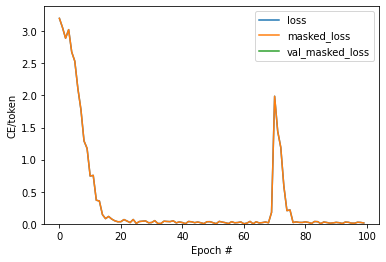

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['masked_loss'], label='masked_loss')
plt.plot(history.history['val_masked_loss'], label='val_masked_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

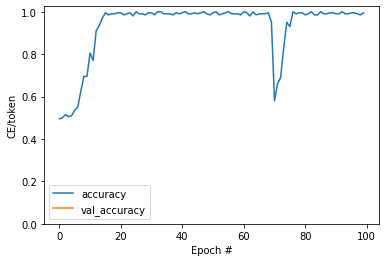

In [ ]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

### Translate

Now that the model is trained, implement a function to execute the full `text => text` translation. This code is basically identical to the [inference example](#inference) in the [decoder section](#the_decoder), but this also captures the attention weights.

In [ ]:
#@title
@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
  # Process the input texts
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(texts)[0]

  # Setup the loop inputs
  tokens = []
  attention_weights = []
  next_token, done, state = self.decoder.get_initial_state(context)

  for _ in range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done,  state, temperature)
        
    # Collect the generated tokens
    tokens.append(next_token)
    attention_weights.append(self.decoder.last_attention_weights)
    
    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Stack the lists of tokens and attention weights.
  tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
  self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

  result = self.decoder.tokens_to_text(tokens)
  return result

Here are the two helper methods, used above, to convert tokens to text, and to get the next token:

In [ ]:
#sample Dataset Library_Management_Dataset_1_input_prerp_each_class_and_entitities_sep_experiment 



result1 = model.translate(['class1,table6,obj1,atr1'])

result2 = model.translate(['class4,table17,obj2,atr2'])

result23 = model.translate(['class14,table2,obj1,atr1'])

result222 = model.translate(['class17,table4,obj2,atr2'])
#result1[0].numpy().decode()
result2[0].numpy().decode()



'moduleom_name:0opendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsclassattrset=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3id=c6_at1noparentisabstract=no}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_

Use that to generate the attention plot:

In [ ]:
#@title
@Translator.add_method
def plot_attention(self, text, **kwargs):
  assert isinstance(text, str)
  output = self.translate([text], **kwargs)
  output = output[0].numpy().decode()

  attention = self.last_attention_weights[0]

  context = tf_lower_and_split_punct(text)
  context = context.numpy().decode().split()

  output = tf_lower_and_split_punct(output)
  output = output.numpy().decode().split()[1:]

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + output, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')

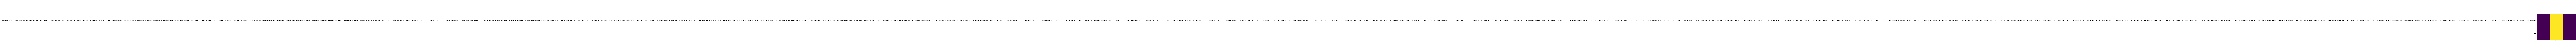

In [ ]:
model.plot_attention('class34,table12,obj23,atr2') # Are you still home

Translate a few more sentences and plot them:

The short sentences often work well, but if the input is too long the model literally loses focus and stops providing reasonable predictions. There are two main reasons for this:

1. The model was trained with teacher-forcing feeding the correct token at each step, regardless of the model's predictions. The model could be made more robust if it were sometimes fed its own predictions.
2. The model only has access to its previous output through the RNN state. If the RNN state looses track of where it was in the context sequence there's no way for the model to recover. [Transformers](transformer.ipynb) improve on this by letting the decoder look at what it has output so far.

The raw data is sorted by length, so try translating the longest sequence:

In [ ]:
long_text = context_raw[-1]

import textwrap
print('Expected output:\n', '\n'.join(textwrap.wrap(target_raw[-1])))

Expected output:
 moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at
1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeo
nesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_a
t1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1exte
ndsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_
typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet
=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at
1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3
_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassat
trSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_t
ypeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=
c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2
extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_
at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+

#Testing existing samples

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report

In [ ]:
df = pd.read_csv('3_OM_P_oversample_test.csv')

In [ ]:
df.head()

,OM_Regular,OM_Prediction
0,"moduleOM_name:0,openDeclarationonesigclass1_na...",1
1,"moduleOM_name:0,openDeclarationonesigclass1_na...",1
2,"moduleOM_name:0,openDeclarationonesigclass1_na...",0
3,"moduleOM_name:0,openDeclarationonesigclass1_na...",1
4,"moduleOM_name:0,openDeclarationonesigclass1_na...",1


In [ ]:
X_test = df['OM_Regular'].values
y_test = df['OM_Prediction'].values

In [ ]:
print(X_test.shape)
print(y_test.shape)

print("\nX data type: ", X_test.dtype)
print("y data type: ", y_test.dtype)

(185,)
(185,)

X data type:  object
y data type:  int64


In [ ]:
print (y_test)

[1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
inputs = X_test

The `translate` function works on batches, so if you have multiple texts to translate you can pass them all at once, which is much more efficient than translating them one at a time:

In [ ]:
#y_train_pred = model.predict(X_train)

In [ ]:
%%time
for t in inputs:
  mylist_res = model.translate([t])[0].numpy().decode()
  print(model.translate([t])[0].numpy().decode())

print()

moduleom_name:0,opendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_type,onesigclass2_nameextendsclassattrset=c2_at1+c2_at2id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_type,onesigclass3_nameextendsclassattrset=c3_at1+c3_at2+c3_at3+c3_at4+c3_at5+c3_at6id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigc3_at5extendsc3_at5_typeonesigc3_at6extendsc3_at6_type,onesigclass4_nameextendsclassattrset=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at3noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_type,onesigclass5_nameextendsclassattrset=c5_at1oneparentparentinclass2_nameid=c2_at1isabstract=no}onesigc5_at1extendsc5_at1_type,onesigclass6_nameextendsclassattrset=c6_at1_0+c6_at2+c

# Classification Report (Existing samples)

In [ ]:
dg = pd.read_csv('dummy_data_test_set_predictions2.csv')

In [ ]:
X_test_pred = dg['OM_Regular'].values
y_test_pred = dg['OM_Prediction'].values

In [ ]:
print (y_test_pred )

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# /-----/ /--/ /-/ /--------/ /---/ /---/ 

In [ ]:
precision = precision_score(y_test, y_test_pred) 
print("Training Data Precision = %f" % precision)


recall = recall_score(y_test, y_test_pred)
print("Training Data Recall = %f" % recall)





f1 = f1_score(y_test, y_test_pred)
print("Training Data F1 Score = %f" % f1)


print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))

Training Data Precision = 0.816901
Training Data Recall = 1.000000
Training Data F1 Score = 0.899225

Confusion Matrix (Test Data):
 [[51 13]
 [ 0 58]]


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        64
           1       0.82      1.00      0.90        58

    accuracy                           0.89       122
   macro avg       0.91      0.90      0.89       122
weighted avg       0.91      0.89      0.89       122



# Testing unseen samples

In [ ]:
dc = pd.read_csv('4_OM_Test_set_q.csv')

In [ ]:
dc.head()

,OM_Regular,OM_Prediction
0,moduleOM_name:0openDeclarationonesigclass1_nam...,1
1,moduleOM_name:0openDeclarationonesigclass1_nam...,1
2,moduleOM_name:0openDeclarationonesigclass1_nam...,1
3,moduleOM_name:0openDeclarationonesigclass1_nam...,0
4,moduleOM_name:0openDeclarationonesigclass1_nam...,1


In [ ]:
X_test2 = dc['OM_Regular'].values
y_test2 = dc['OM_Prediction'].values

In [ ]:
print(X_test2.shape)
print(y_test2.shape)

print("\nX data type: ", X_test2.dtype)
print("y data type: ", y_test2.dtype)

(132,)
(132,)

X data type:  object
y data type:  int64


In [ ]:
print(y_test2)

[1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
inputs = X_test2

In [ ]:
%%time
for t in inputs:
  #mylist_res = model.translate([t])[0].numpy().decode()
  print(model.translate([t])[0].numpy().decode())

print()

moduleom_name:0opendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsclassattrset=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3id=c6_at1noparentisabstract=no}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_a

# Classification Report (Unseen samples)


In [ ]:
dd = pd.read_csv('4_OM_Test_set_q_pred.csv')

In [ ]:
dd.head()

,OM_Regular,OM_Prediction
0,moduleom_name:0opendeclarationonesigclass1_nam...,1
1,moduleom_name:0opendeclarationonesigclass1_nam...,1
2,moduleom_name:0opendeclarationonesigclass1_nam...,1
3,moduleom_name:0opendeclarationonesigclass1_nam...,0
4,moduleom_name:0opendeclarationonesigclass1_nam...,1


In [ ]:
X_test_pred2 = dd['OM_Regular'].values
y_test_pred2 = dd['OM_Prediction'].values

In [ ]:
print (y_test_pred2 )

[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
precision = precision_score(y_test2, y_test_pred2) 
print("Testing: Precision = %f" % precision)


recall = recall_score(y_test2, y_test_pred2)
print("Testing: Recall = %f" % recall)


f1 = f1_score(y_test2, y_test_pred2)
print("Testing: F1 Score = %f" % f1)

print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test2, y_test_pred2))

Testing: Precision = 0.401961
Testing: Recall = 0.872340
Testing: F1 Score = 0.550336

Confusion Matrix (Test Data):
 [[24 61]
 [ 6 41]]


In [ ]:
print(classification_report(y_test2,y_test_pred2))

              precision    recall  f1-score   support

           0       0.80      0.28      0.42        85
           1       0.40      0.87      0.55        47

    accuracy                           0.49       132
   macro avg       0.60      0.58      0.48       132
weighted avg       0.66      0.49      0.46       132



# Testing unseen samples extended 





In [ ]:
dx = pd.read_csv('dummy_data_unseen_extended.csv')

In [ ]:
dx.head()

,OM_Regular,OM_Prediction
0,"table121,class221,obj31,atr1,obj32,atr2",0
1,"table122,class222,obj31,atr1,obj32,atr2",0
2,"table123,class223,obj31,atr1,obj32,atr2",0
3,"table124,class224,obj31,atr1,obj32,atr2",0
4,"table125,class225,obj31,atr1,obj32,atr2",0


In [ ]:
X_test3 = dx['OM_Regular'].values
y_test3 = dx['OM_Prediction'].values

In [ ]:
print(y_test3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [ ]:
inputg = X_test3

In [ ]:
%%time
for t in inputg:
  #mylist_res = model.translate([t])[0].numpy().decode()
  print(model.translate([t])[0].numpy().decode())

print()

class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,a

#Classification Report (Unseen Extended samples)

In [ ]:
dy = pd.read_csv('dummy_data_unseen_undersample.csv')

In [ ]:
dy.head()

,OM_Regular,OM_Prediction
0,"table121,class221,obj31,atr1,obj32,atr2",0
1,"table122,class222,obj31,atr1,obj32,atr2",0
2,"table123,class223,obj31,atr1,obj32,atr2",0
3,"table124,class224,obj31,atr1,obj32,atr2",0
4,"table125,class225,obj31,atr1,obj32,atr2",0


In [ ]:
X_test_pred3 = dy['OM_Regular'].values
y_test_pred3 = dy['OM_Prediction'].values

In [ ]:
print (y_test_pred3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


##ValueError: Found input variables with inconsistent numbers of samples: [122, 155]

# Testing unseen samples under samples


In [ ]:
dz = pd.read_csv('dummy_data_unseen_undersample.csv')

In [ ]:
dz.head()

,OM_Regular,OM_Prediction
0,"table121,class221,obj31,atr1,obj32,atr2",0
1,"table122,class222,obj31,atr1,obj32,atr2",0
2,"table123,class223,obj31,atr1,obj32,atr2",0
3,"table124,class224,obj31,atr1,obj32,atr2",0
4,"table125,class225,obj31,atr1,obj32,atr2",0


In [ ]:
X_test4 = dz['OM_Regular'].values
y_test4 = dz['OM_Prediction'].values

In [ ]:
print(y_test4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
inputop = X_test4

In [ ]:
%%time
for t in inputop:
  #mylist_res = model.translate([t])[0].numpy().decode()
  print(model.translate([t])[0].numpy().decode())

print()

class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,atr1,np 
class1,table2,obj1,a